In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:2: SyntaxWarning: invalid escape sequence '\F'
<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:2: SyntaxWarning: invalid escape sequence '\F'
C:\Users\cdsim\AppData\Local\Temp\ipykernel_2524\1331231221.py:1: SyntaxWarning: invalid escape sequence '\F'
  query = cv2.imread('..\FFVI\\Dialog\\texto_baixo.png')
C:\Users\cdsim\AppData\Local\Temp\ipykernel_2524\1331231221.py:2: SyntaxWarning: invalid escape sequence '\F'
  train = cv2.imread('..\FFVI\\Dialog\\textbox.png')


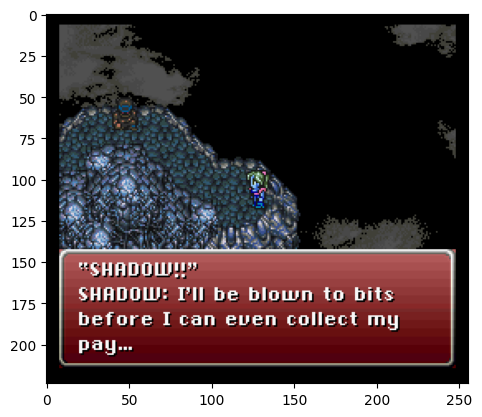

In [8]:
query = cv2.imread('..\FFVI\\Dialog\\texto_baixo.png')
train = cv2.imread('..\FFVI\\Dialog\\textbox.png')

query_g = cv2.cvtColor(query, cv2.COLOR_BGR2GRAY)
train_g = cv2.cvtColor(train, cv2.COLOR_BGR2GRAY)

# query_height, query_width = query.shape
# train_height, train_width = train.shape

plt.imshow(query)

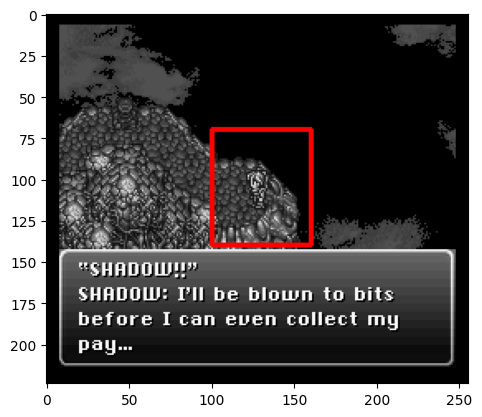

In [9]:
color = (0, 255, 0)

thickness = 2

rectangle_output = cv2.cvtColor(query_g, cv2.COLOR_GRAY2BGR)
cv2.rectangle(rectangle_output, (160, 70), (100, 140), color=(255,0,0), thickness=2)

# player (118, 125), (138, 90)
# area em volta (160, 70), (100, 140)
plt.imshow(rectangle_output)

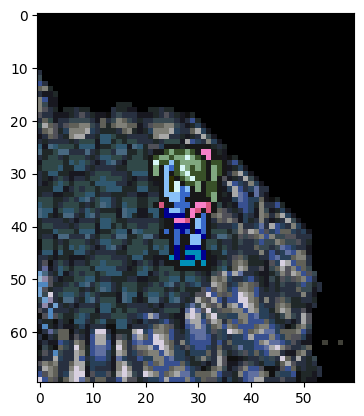

In [10]:
regiao_recortada = query[70:140, 100:160]
plt.imshow(regiao_recortada)

# player (118, 125), (138, 90)
# area em volta (160, 70), (100, 140)

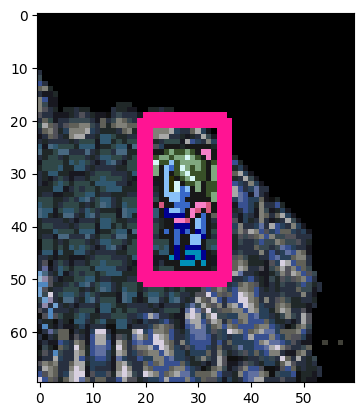

In [11]:
color = (0, 255, 0)

thickness = 1

cv2.rectangle(regiao_recortada, (35, 20), (20, 50), color=(255, 20, 147), thickness=2)

# player (118, 125), (138, 90)
# area em volta (160, 70), (100, 140)
plt.imshow(regiao_recortada)

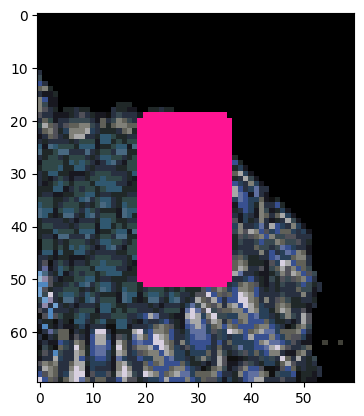

In [12]:
cv2.rectangle(regiao_recortada, (35, 20), (20, 50), color=(255, 20, 147), thickness=cv2.FILLED)

# player (118, 125), (138, 90)
# area em volta (160, 70), (100, 140)
plt.imshow(regiao_recortada)